In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import random

# data

In [2]:
data_1d = pd.read_csv('RegData.csv', header=None)
X_1d = data_1d[0]
y_1d = data_1d[1]

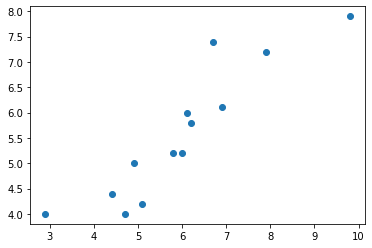

In [3]:
plt.scatter(X_1d, y_1d)
plt.show()

In [4]:
data_2d = pd.read_csv('MultipleLR.csv', header=None)
X_2d= data_2d.iloc[:,:-1]
y_2d = data_2d.iloc[:,-1:]

# stochastic Vanilla Gradient Descent

In [5]:
def GD_stochastic(X, Y, n_iters, theta_0=0, theta_1=0, learning_rate=0.001):
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta_0, theta_1 = theta_0, theta_1
    learning_rate = learning_rate
    MSE_list = []

    for i in range(0, n_iters):
        if len(MSE_list)>0:
            loss_batch = MSE_list[-1]
        for x, y in zip(X,Y):
            #Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
            h_theta = theta_0 + theta_1*x

            #Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).
            MSE = (h_theta - y)**2
            MSE_list.append(MSE)
            #Step4: Calculate the gradient.
            drev_theta0 = h_theta - y
            drev_theta1 = ((h_theta - y)* x)

            #Step5: Update the parameters (simultaneously).
            theta_0 = theta_0 - learning_rate*drev_theta0
            theta_1 = theta_1 - learning_rate*drev_theta1

        #Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        #stop condition 1
        if (i>0) and (np.abs(loss_batch - MSE_list[-1]) < 0.01):
            break

        #stop condition 2
        theta_vector = [drev_theta0, drev_theta1]
        gradient = np.linalg.norm(theta_vector)
        if i > 0 and gradient < 0.3:
            break
        
    return theta_0, theta_1, MSE_list

In [6]:
theta_0, theta_1, error_list = GD_stochastic(X_1d, y_1d, 2000, theta_0=0, theta_1=0, learning_rate=0.001)

In [7]:
h_theta = theta_0 + theta_1*X_1d

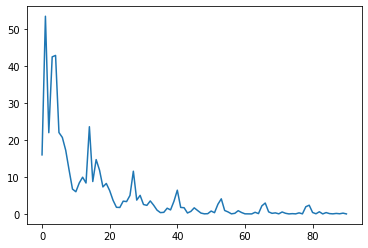

In [8]:
plt.plot(error_list);

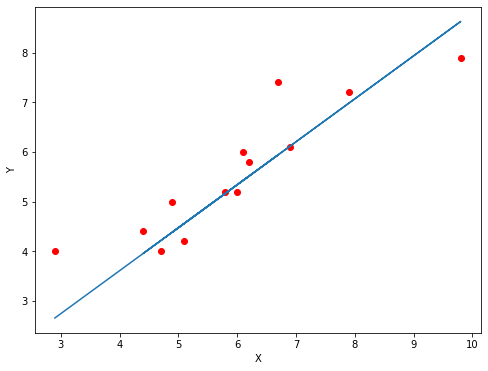

In [9]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_1d, y_1d, marker='o', color='red')
plt.plot(X_1d, h_theta)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# multi variable _ stochastic

In [10]:
def GD_MV_stox(X, Y, n_iters, learning_rate=0.001):
    X = X.values
    Y = Y.values
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta = np.zeros([X.shape[1],1])
    learning_rate = learning_rate
    MSE_list = []
    for i in range(0, n_iters):
        if len(MSE_list)>0:
            loss_batch = MSE_list[-1]
        for x, y in zip(X, Y):
            #Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.

            h_theta = np.array([x])@theta

            err = h_theta - y
            MSE = ((err.T) @ err)
            
            MSE_list.append(MSE[0][0])
            drev = (np.array([x]).T @ err)
            
            #Step5: Update the parameters (simultaneously).
            theta = theta - learning_rate*drev
            #theta -> 4,1

        #Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        #stop condition 1
        if (i>0) and (np.abs(loss_batch - MSE_list[-1]) < 0.01):
            break
           
        #stop condition 2
        gradient = np.linalg.norm(theta)
        if i > 0 and gradient < 0.1:
            break
        
    return theta, MSE_list

In [11]:
theta , error_list = GD_MV_stox(X_2d, y_2d, 1000, learning_rate=0.00001)

In [12]:
h_theta = X_2d@theta

In [13]:
error_list[-1]

0.2548572486786665

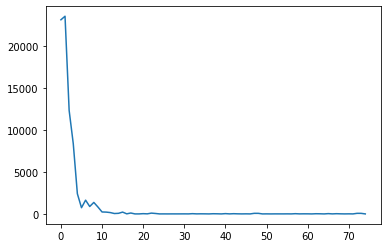

In [14]:
plt.plot(error_list);

In [15]:
r2_score(y_2d, h_theta)

0.978606959161558